#### Data info
You are provided hourly rental data spanning two years.

For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month.

You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

#### Column info
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# bring data
df = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
bike = df.copy()

In [3]:
# check bike info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# check for any null values
bike.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [5]:
bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
# separate time into 6 diff columns
bike['year'] = pd.to_datetime(bike['datetime']).dt.year
bike['month'] = pd.to_datetime(bike['datetime']).dt.month
bike['day'] = pd.to_datetime(bike['datetime']).dt.day
bike['hour'] = pd.to_datetime(bike['datetime']).dt.hour
bike['minute'] = pd.to_datetime(bike['datetime']).dt.minute
bike['second'] = pd.to_datetime(bike['datetime']).dt.second

<AxesSubplot:xlabel='second', ylabel='count'>

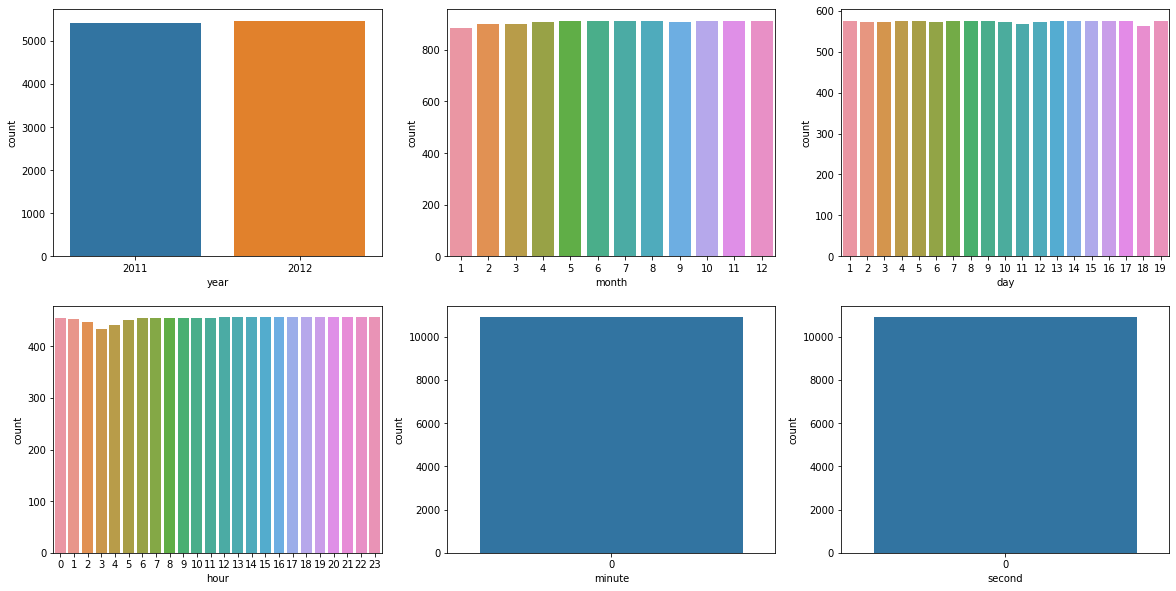

In [7]:
# visualizing 6 cols of datetime
# use figsize in subplots in order to change graph size
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

sns.countplot(data=bike, x='year', ax=ax1)
sns.countplot(data=bike, x='month', ax=ax2)
sns.countplot(data=bike, x='day', ax=ax3)
sns.countplot(data=bike, x='hour', ax=ax4)
sns.countplot(data=bike, x='minute', ax=ax5)
sns.countplot(data=bike, x='second', ax=ax6)

In [8]:
# remove casual and registered as they are part of count
# also get rid of datetime, since it's been split
# lastly remove minute and second since they are all zero
bike.drop(['casual', 'registered', 'datetime', 'minute', 'second'], axis=1, inplace=True)

In [9]:
# one-hot encoding categorical columns
bike = pd.get_dummies(bike, columns=['holiday', 'workingday', 'season', 'weather', 'year', 'month', 'day', 'hour'])
bike

,temp,atemp,humidity,windspeed,count,holiday_0,holiday_1,workingday_0,workingday_1,season_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,14.395,81,0.0000,16,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,0.0000,40,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,0.0000,32,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9.84,14.395,75,0.0000,13,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9.84,14.395,75,0.0000,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,336,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
10882,14.76,17.425,57,15.0013,241,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
10883,13.94,15.910,61,15.0013,168,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
10884,13.94,17.425,61,6.0032,129,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
# assign count as target
y = bike['count']
del bike['count']

In [11]:
# checking col names
bike.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'year_2011', 'year_2012', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [12]:
# set feature
features = ['temp', 'atemp', 'humidity', 'windspeed', 'holiday_0', 'holiday_1',
           'workingday_0', 'workingday_1', 'season_1', 'season_2', 'season_3',
           'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
           'year_2011', 'year_2012', 'month_1', 'month_2', 'month_3', 'month_4',
           'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
           'month_11', 'month_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
           'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
           'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
           'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
           'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
           'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
           'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']

# assign data
X = bike[features]
X

,temp,atemp,humidity,windspeed,holiday_0,holiday_1,workingday_0,workingday_1,season_1,season_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,14.395,81,0.0000,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,0.0000,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,0.0000,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9.84,14.395,75,0.0000,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.84,14.395,75,0.0000,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
10882,14.76,17.425,57,15.0013,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
10883,13.94,15.910,61,15.0013,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10884,13.94,17.425,61,6.0032,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
# load train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8708, 73) (2178, 73) (8708,) (2178,)


In [14]:
# load linear regression model
from sklearn.linear_model import LinearRegression

# assign
model = LinearRegression()

# fit and predict model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
# load mse metric
from sklearn.metrics import mean_squared_error

# print mse and rmse aka loss
print('mse :', mean_squared_error(y_test, y_pred))
print('rmse :', mean_squared_error(y_test, y_pred, squared=False))

mse : 10190.96426563946
rmse : 100.95030592147535


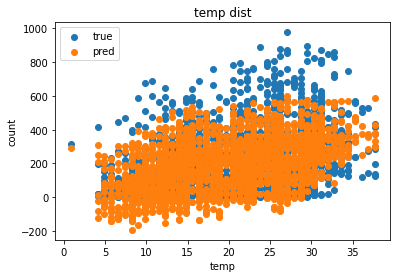

In [16]:
# visualize temp column
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], y_pred, label="pred")
plt.title('temp dist')
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()

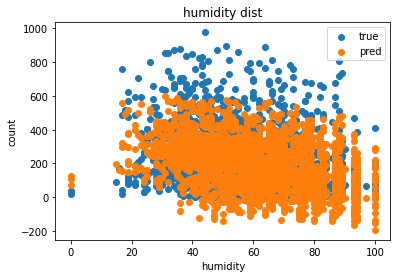

In [17]:
# visualize humidity column with scatterplot
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], y_pred, label="pred")
plt.title('humidity dist')
plt.xlabel('humidity')
plt.ylabel('count')
plt.legend()
plt.show()

1st attempt
- mse : 20347.21722354433
- rmse : 142.64367221697682
- applied one-hot encoding on season and holiday cols
- pics below show that the pred is pretty off
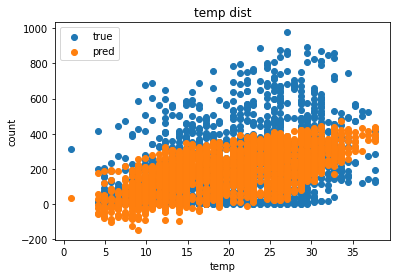

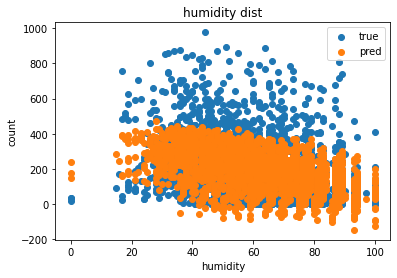

2nd attempt
- mse : 10191.03608158354
- rmse : 100.9506616203358
- applied one-hot encoding to year, month, day, hour
- now it's looks more like a decent pred
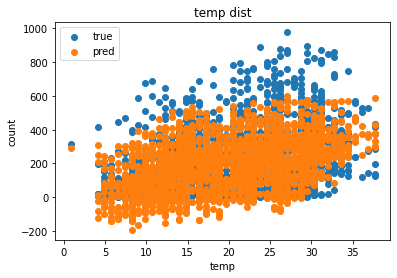

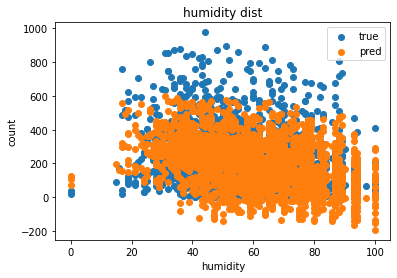

Further steps to take:

Don't think there can be a case where windspeed is 0.

Pick windspeed that is 0 and use ML to predict the windspeed or change to random numbers between 0 and 1.